## Project 3 : Ensemble Techniques-Term Deposit Subscription Prediction
   #### Submitted by : Amarpreet Bassan

## Table Of Contents:

1. [Prerequisites/Assumptions](#Prerequisites/Assumptions:)<p></p>

2. [Information About the Fields](#information-about-the-fields:)<p></p>

3. Import of Modules and Libraries
    1. [Import Pandas and Charting Libraries](#Importing-the-pandas-and-charting-libraries:)
    2. [Import Scikit Learn Related Modules](#Importing-the-sklearn-related-modules)
<p></p>
4. [Summary of the Activities Performed in the EDA](#Summary-of-the-Activities-performed-in-the-EDA.)
<p></p>
5. [Data Analysis Section](#Data-Analysis-Section-Begins)
    * [Single Variable Analysis](#SIngle-variable-Analysis)
        * [Univariate Analysis-Conclusion](#Conclusion-of-Univariate-Analysis-above:) 
    * [Bivariate Analysis](#Bivariate-Analysis-Begins)
<p></p>
6. [Splitting of Data and getting the Data Model Ready](#Splitting-the-data-into-train-and-validation-portion-Begins)
<p></p>
7. [Logistic Regression and Decision Tree](#Logistic-Regression-and-Decision-Tree)
    * [Logistic Regression](#Logistic-Regression)
    * [Decision Tree](#Decision-Tree)
    * [Conclusion and Model Selection](#Conclusion-and-Model-Selection:)
<p></p>
8. [Bagging, Boosting](#Bagging,-Boosting)
    * [Bagging](#Bagging)
        * [Bagging with Logistic Regression](#Bagging-for-Logistic-Regression)
        * [Bagging for Decision Trees](#Bagging-for-Decision-Tree)
        * [Bagging for Random Forests](#Bagging-for-Random-Forests)
        * [Conclusion for Bagging](#Conclusion-for-Bagging:)
        
    * [Boosting](#Boosting)
        * [Gradient Boosting](#GradientBoosting)
            * [Observations for Gradient Boosting](#Observations-for-Gradient-Boosting:)
        * [Ada Boost](#AdaBoosting)
            * [Observations for AdaBoost](#Observations-for-AdaBoost:)
<p></p>
9. [Comparison-Dataframe](#Comparison-Dataframe)
    * [Conclusion](#Conclusion)


### Prerequisites/Assumptions:
Required Modules:
1. pandas
2. numpy
3. imbalanced-learn
4. pydotplus
5. graphviz




Assumptions:
1. Pydotplus package is assumed to be installed on the machine where this notebook is executed.
2. The csv is assumed to be in the same folder of the notebook
3. The graphviz is assumed to be installed on the machine.
4. The library imbalanced-learn is assumed to be installed on the machine.

#### Note
    1. Pydotplus and graphviz is only required for visualizing the tree. 
    2. if the two packages are not installed, the execution of the cell visualizing the tree might throw an error.
    3. the pdf version of this notebook contains the visualization.



### information about the fields:

Bank client data:

    1. age: Continuous feature
    2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. marital: marital status (married, single, divorced)
    4. education: education level (primary, secondary, tertiary)
    5. default: has credit in default?
    6. housing: has housing loan?
    7. loan: has personal loan?
    8. balance in account
Related to previous contact:
    9. contact: contact communication type
    10. month: last contact month of year
    11. day: last contact day of the month
    12. duration: last contact duration, in seconds*
Other attributes:
    13. campaign: number of contacts performed during this campaign and for this
    client
    14. pdays: number of days that passed by after the client was last contacted from a
    previous campaign (-1 tells us the person has not been contacted or contact
    period is beyond 900 days)
    15. previous: number of contacts performed before this campaign and for this
    client
    16. poutcome: outcome of the previous marketing campaign
    Output variable (desired target):
    17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

#### Importing the pandas and charting libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
pd.options.display.float_format = '{:.4f}'.format
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:98% !important}</style>'))
from yellowbrick.classifier import ClassificationReport, ROCAUC


from imblearn.over_sampling import SMOTE

#### Importing the sklearn related modules

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier



## Summary of the Activities performed in the EDA.

## ["Data Analysis Section Begins"](http://localhost:8888/notebooks/Project3-EnsembleTechniques-TermDepositSubscriptionPrediction.ipynb#Data-Analysis-Section-Begins) marks the beginning of EDA

1. Performed Single variable Analysis

##### Outcome:
        1. log transformed the age column.
        2. log transformed the duration column.
        3. Found that the target variable is quite imbalanced.
        4. found that the job and education columns had values of unknown. 
        5. Replaced the job unknown value with mode : blue-collar
        6. replaced the education with mode : secondary.
        7. Converted all the categorical columns to their category codes.
        
        
2. Performed Multivariate Analysis:

####  Outcome:
        1. pdays and previous has a correlation.
        2. None of the category columns had strong correlation.
        3. Since pdays, previous, balance, campaign had highly skewed values, distributed these values into bins and converted them to categorical variables.
        
3. Performed SMOTING for the imbalance of the Target variable.

the final feature dataframe and target dataframe is : X_sm, y_sm

## ["End of EDA"](http://localhost:8888/notebooks/Project3-EnsembleTechniques-TermDepositSubscriptionPrediction.ipynb#End-of-EDA) marks the end of EDA


## Data Analysis Section Begins

##### SIngle variable Analysis

In [3]:
#Loading the data:
basedf = pd.read_csv('bank-full.csv')

In [4]:
bankdf = basedf.copy()

In [5]:
#investigating the shap
bankdf.shape

(45211, 17)

In [6]:
#generating randome number for rows
random_rows = np.random.randint(low = 0, high = 45200, size = 10)
random_rows


array([10822, 17174, 15628, 35473, 38997, 42547, 35738, 13079,  4748,
       16320])

In [7]:
#investigating the random rows of the dataframe

bankdf.iloc[random_rows,:]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
10822,50,blue-collar,married,primary,no,2190,no,no,unknown,17,jun,269,1,-1,0,unknown,no
17174,27,services,married,secondary,no,0,yes,no,cellular,28,jul,334,8,-1,0,unknown,no
15628,42,blue-collar,married,primary,no,401,yes,no,cellular,21,jul,581,4,-1,0,unknown,no
35473,58,management,married,tertiary,no,246,yes,no,cellular,7,may,245,2,288,2,failure,no
38997,28,services,single,secondary,no,373,yes,no,cellular,18,may,115,2,-1,0,unknown,no
42547,30,blue-collar,married,primary,no,5,no,no,cellular,23,dec,282,1,203,1,success,yes
35738,46,blue-collar,married,unknown,no,842,yes,no,telephone,8,may,833,1,-1,0,unknown,yes
13079,56,retired,married,tertiary,no,87,no,no,cellular,8,jul,136,2,-1,0,unknown,no
4748,34,blue-collar,married,unknown,no,1117,yes,no,unknown,20,may,214,1,-1,0,unknown,no
16320,42,self-employed,married,tertiary,no,-426,yes,no,telephone,23,jul,160,7,-1,0,unknown,no


##### Observations:
1. SOme of the account balances are -ve
2. One record with balance as -ve has both housing and personal loan - This is interesting.
3. contact column as unknown still has contact day, month and duration. 
4. for some values of poutcome as unknown , we do have some Targets as yes.

In [8]:
#Let us describe the dataset
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Get the list of numeric columns from above observations:
numerical_cols = bankdf.select_dtypes(include = 'number')
numerical_cols.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [10]:
#get the list of object columns from above observations
object_cols = bankdf.select_dtypes(exclude = 'number')
object_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

#### Investigating the value counts for all the object columns

In [11]:
bankdf['job'].value_counts(normalize = True)

blue-collar     0.2153
management      0.2092
technician      0.1680
admin.          0.1144
services        0.0919
retired         0.0501
self-employed   0.0349
entrepreneur    0.0329
unemployed      0.0288
housemaid       0.0274
student         0.0207
unknown         0.0064
Name: job, dtype: float64

In [12]:
#let us investigate the value counts for all object columns
headerrow = "|-----------{colname}----------------".format
for col in object_cols.columns:
    print(headerrow(colname = col))
    print(bankdf[col].value_counts(normalize = True))

|-----------job----------------
blue-collar     0.2153
management      0.2092
technician      0.1680
admin.          0.1144
services        0.0919
retired         0.0501
self-employed   0.0349
entrepreneur    0.0329
unemployed      0.0288
housemaid       0.0274
student         0.0207
unknown         0.0064
Name: job, dtype: float64
|-----------marital----------------
married    0.6019
single     0.2829
divorced   0.1152
Name: marital, dtype: float64
|-----------education----------------
secondary   0.5132
tertiary    0.2942
primary     0.1515
unknown     0.0411
Name: education, dtype: float64
|-----------default----------------
no    0.9820
yes   0.0180
Name: default, dtype: float64
|-----------housing----------------
yes   0.5558
no    0.4442
Name: housing, dtype: float64
|-----------loan----------------
no    0.8398
yes   0.1602
Name: loan, dtype: float64
|-----------contact----------------
cellular    0.6477
unknown     0.2880
telephone   0.0643
Name: contact, dtype: float64
|------

##### Obeservations: 
1. 28% of the pcontact is unknown
2. 81% of poutcome is unknown
3. 4% of education is unknown
4. .6% of job is unknown

#### Investigating the value counts for all the numerical columns

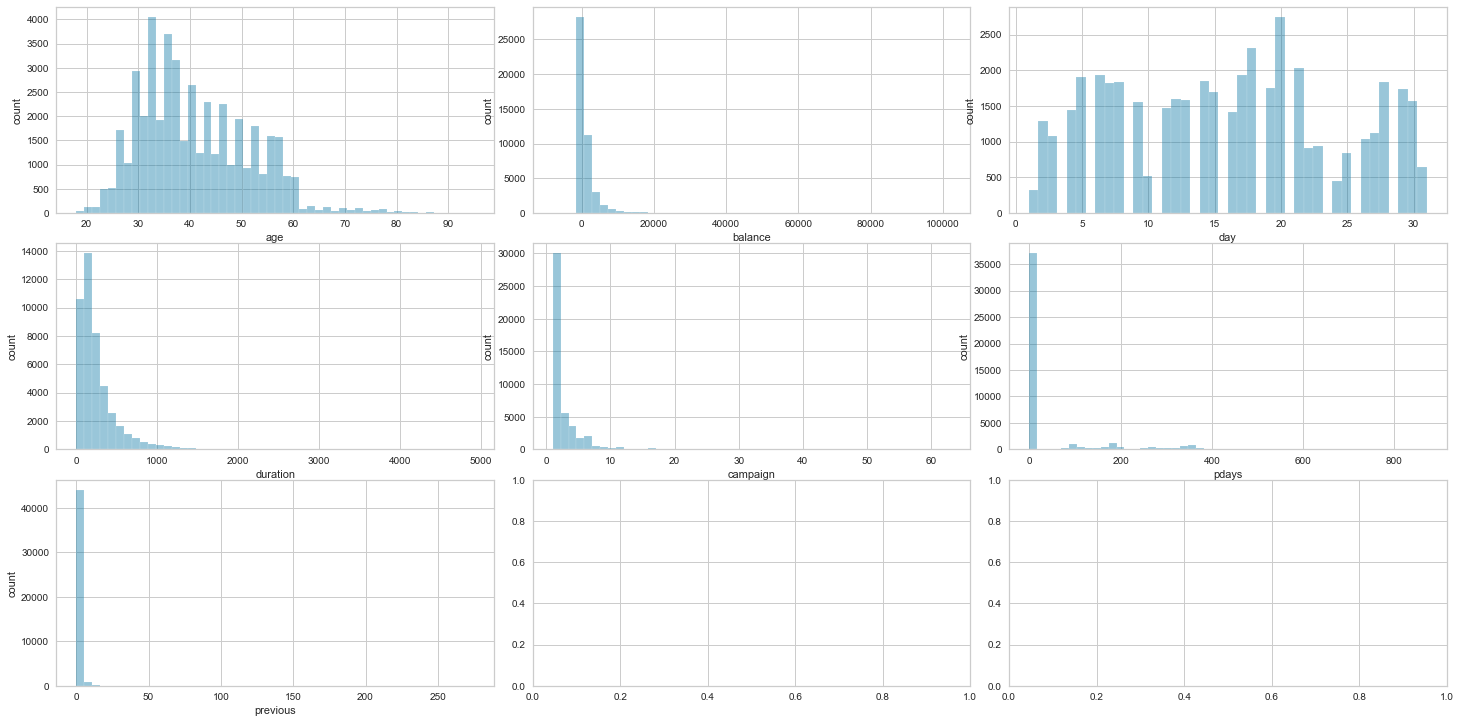

In [13]:
num_numerical_cols = len(numerical_cols.columns)
num_rows = np.ceil(num_numerical_cols/3)
num_cols = 3
col_index = 0
fig, ax = plt.subplots(figsize=(20, 10),nrows = num_rows.astype(int), ncols = num_cols);
fig.tight_layout();
for rowi in range(int(num_rows)):
    for coli in range(num_cols):
        sns.distplot(bankdf[numerical_cols.columns[col_index]], ax = ax[rowi][coli], kde = False);
        ax[rowi][coli].set(xlabel = numerical_cols.columns[col_index],ylabel = 'count');
        col_index += 1
        if col_index == len(numerical_cols.columns):
            break

##### Observations:
1. All the columns have a right tail.
2. majority of the people are below the age of 60
3. we need to do standardization and normalization for all the values.

#### Investigating the value counts for all the categorical columns

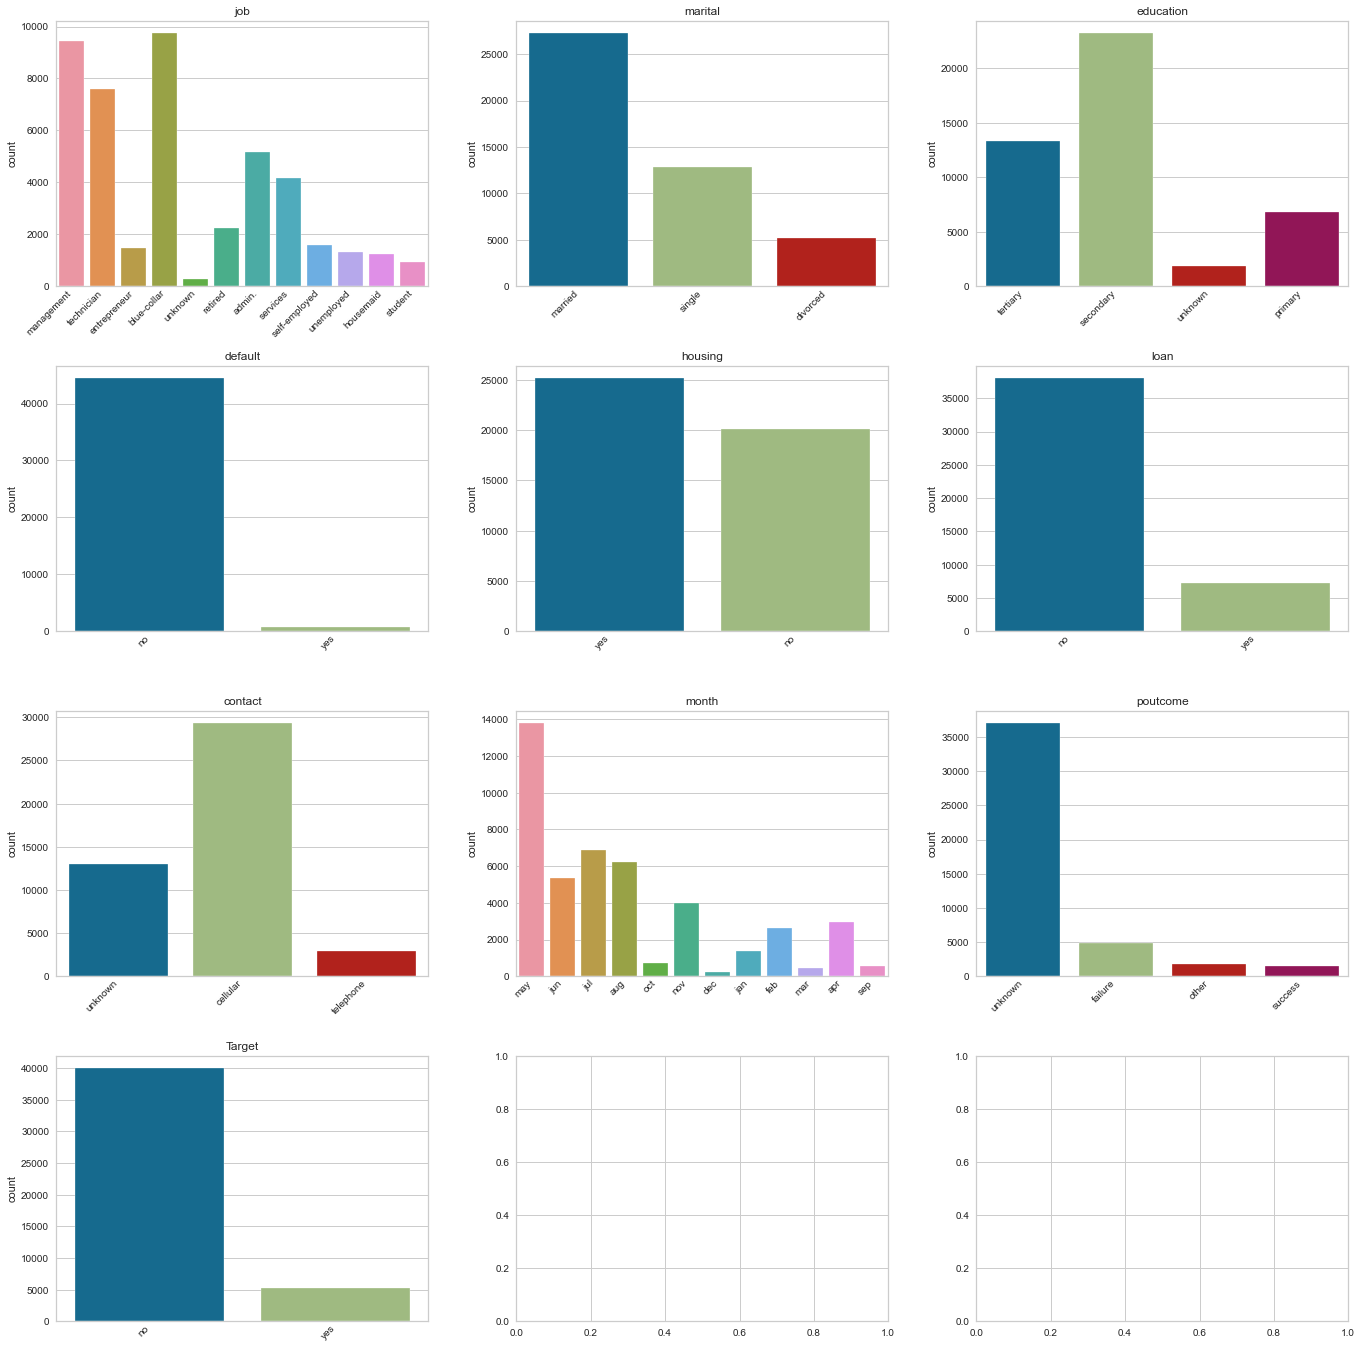

In [14]:
num_object_cols = len(object_cols.columns)
num_rows = np.ceil(num_object_cols/3)
num_cols = 3
col_index = 0
fig, ax = plt.subplots(figsize=(20, 20),nrows = num_rows.astype(int), ncols = num_cols);
fig.tight_layout(pad = 6.0);
#sns.countplot(bankdf[object_cols.columns[col_index]] , ax = ax[0][0]);
#ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=45, rotation_mode="anchor", horizontalalignment="right")
#ax[0][0].set(ylabel = 'count');


for rowi in range(int(num_rows)):
    for coli in range(num_cols):
        sns.countplot(bankdf[object_cols.columns[col_index]], ax = ax[rowi][coli]);
        ax[rowi][coli].set_xticklabels(ax[rowi][coli].get_xticklabels(), rotation=45, rotation_mode="anchor", horizontalalignment="right", verticalalignment= 'baseline')
        ax[rowi][coli].set(ylabel = 'count', title = object_cols.columns[col_index], xlabel = '');
        col_index += 1
        if col_index == len(object_cols.columns):
            break


##### Observations:
1. There is a imbalance in the target variable.
2. The poutcome unknown value is very imbalanced.
3. the unknown in education and job is not so significant , 4% and .6% respectively. we can replace them by mode. but the unknown in poutcome will require further analysis.

#### Scaling of numerical columns

In [15]:
#let us calculate the values for age:
bankdf['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [16]:
#I will try a log transformation for this column.
#bankdf['log_age'] = bankdf['age'].apply(np.log)

bankdf['log_age'] = np.log(bankdf['age']+1)

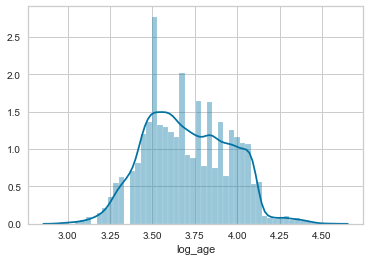

In [17]:
#we will see the distribution now.
sns.distplot(bankdf['log_age'])

In [18]:
#value count for balance gives me the following :

bankdf['balance'].value_counts(bins = 10)

(-8129.147, 2995.6]    39587
(2995.6, 14010.2]       5233
(14010.2, 25024.8]       294
(25024.8, 36039.4]        58
(36039.4, 47054.0]        21
(47054.0, 58068.6]         7
(58068.6, 69083.2]         6
(91112.4, 102127.0]        2
(80097.8, 91112.4]         2
(69083.2, 80097.8]         1
Name: balance, dtype: int64

In [19]:
bankdf[bankdf['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,log_age
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no,3.8067
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no,3.8501
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no,3.2581
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no,3.9890
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no,3.6109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes,3.4657
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes,3.3673
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no,3.5264
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no,3.8918


In [20]:
#since there are many values that are less than zero, I will not normalize or scale balance values as of now.

In [21]:
#we also transform duration column
bankdf['duration_log'] = np.log(bankdf['duration'] + 1)

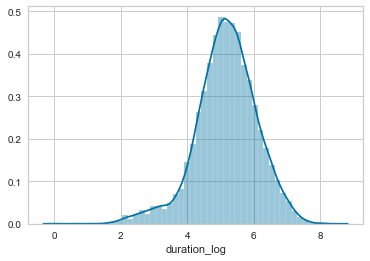

In [22]:
sns.distplot(bankdf['duration_log'])


In [23]:
#transform campaign column 
bankdf['campaign_log'] = np.log(bankdf['campaign'] + 1)

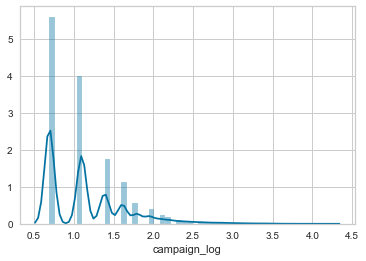

In [24]:
sns.distplot(bankdf['campaign_log'])

In [25]:
#we define a sigmoid function
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [26]:
bankdf['campaign_sigmoid'] = sigmoid(bankdf['campaign'])

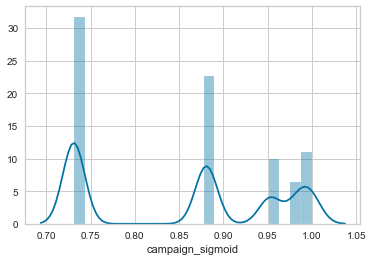

In [27]:
sns.distplot(bankdf['campaign_sigmoid'])
#We see huge gaps even with sigmoid normalization. so I will not consider scaling or normalizing campaign column as of now.

In [28]:
#let us see the values of pdays
bankdf['pdays'].value_counts(normalize = True, bins = 100)

(-1.873, 7.72]     0.8192
(173.4, 182.12]    0.0137
(86.2, 94.92]      0.0125
(182.12, 190.84]   0.0122
(356.52, 365.24]   0.0089
                    ...  
(705.32, 714.04]   0.0000
(792.52, 801.24]   0.0000
(809.96, 818.68]   0.0000
(565.8, 574.52]    0.0000
(635.56, 644.28]   0.0000
Name: pdays, Length: 100, dtype: float64

In [29]:
#similarly for the value of previous 
bankdf['previous'].value_counts(normalize = True, bins = 100)

(-0.276, 2.75]    0.9253
(2.75, 5.5]       0.0512
(5.5, 8.25]       0.0135
(8.25, 11.0]      0.0050
(11.0, 13.75]     0.0018
                   ...  
(148.5, 151.25]   0.0000
(151.25, 154.0]   0.0000
(154.0, 156.75]   0.0000
(156.75, 159.5]   0.0000
(134.75, 137.5]   0.0000
Name: previous, Length: 100, dtype: float64

#### Observation:
1. Only Age and duration gives us normalized data.
2. we leave the other columsn as is.
3. the numeric columns to be considered next are : ['log_age', 'balance', 'day', 'duration_log', 'campaign', 'pdays', 'previous']

#### categorical columns analysis based on observation

In [30]:
#we have unknown in two columns : job and education.
#we replace the unknown in job with mode : blue-collar
#we replace the unknown in education with mode : secondary

bankdf['job'].replace(to_replace = ['unknown'], value = 'blue-collar', inplace = True)
bankdf['education'].replace(to_replace = ['unknown'], value = 'secondary', inplace = True)

In [31]:
#first change the typd of every object type to category


bankdf[object_cols.columns]= bankdf[object_cols.columns].astype('category')

In [32]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45211 non-null  int64   
 1   job               45211 non-null  category
 2   marital           45211 non-null  category
 3   education         45211 non-null  category
 4   default           45211 non-null  category
 5   balance           45211 non-null  int64   
 6   housing           45211 non-null  category
 7   loan              45211 non-null  category
 8   contact           45211 non-null  category
 9   day               45211 non-null  int64   
 10  month             45211 non-null  category
 11  duration          45211 non-null  int64   
 12  campaign          45211 non-null  int64   
 13  pdays             45211 non-null  int64   
 14  previous          45211 non-null  int64   
 15  poutcome          45211 non-null  category
 16  Target            4521

In [33]:
#we will create a new column containing the cat code for each of the columns. 
#'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target'

bankdf['job_cat'] = bankdf['job'].cat.codes
bankdf['marital_cat'] = bankdf['marital'].cat.codes
bankdf['education_cat'] = bankdf['education'].cat.codes
bankdf['default_cat'] = bankdf['default'].cat.codes
bankdf['housing_cat'] = bankdf['housing'].cat.codes
bankdf['loan_cat'] = bankdf['loan'].cat.codes
bankdf['contact_cat'] = bankdf['contact'].cat.codes
bankdf['month_cat'] = bankdf['month'].cat.codes
bankdf['poutcome_cat'] = bankdf['poutcome'].cat.codes
bankdf['Target_cat'] = bankdf['Target'].cat.codes


## Conclusion of Univariate Analysis above:
1. All teh values are numeric.
2. Two numeric columns are standardized and normalized.
3. All the unknowns from category columns are removed.

## Bivariate Analysis Begins

In [34]:
# the following are the numeric and categorical columns to consider
numeric_columns = ['log_age', 'balance', 'day', 'duration_log', 'campaign', 'pdays', 'previous']
categorical_columns = ['job_cat', 'marital_cat', 'education_cat', 'default_cat', 'housing_cat', 'loan_cat', 'contact_cat', 'month_cat', 'poutcome_cat']
target_colum = ['Target_cat']

In [35]:
bankdf_stage1 = bankdf[['log_age', 'balance', 'day', 'duration_log', 'campaign', 'pdays', 'previous',
                        'job_cat', 'marital_cat', 'education_cat', 'default_cat', 'housing_cat', 'loan_cat', 'contact_cat', 'month_cat', 'poutcome_cat'
                       ,'Target_cat']].copy()

In [36]:
df = bankdf_stage1.copy()

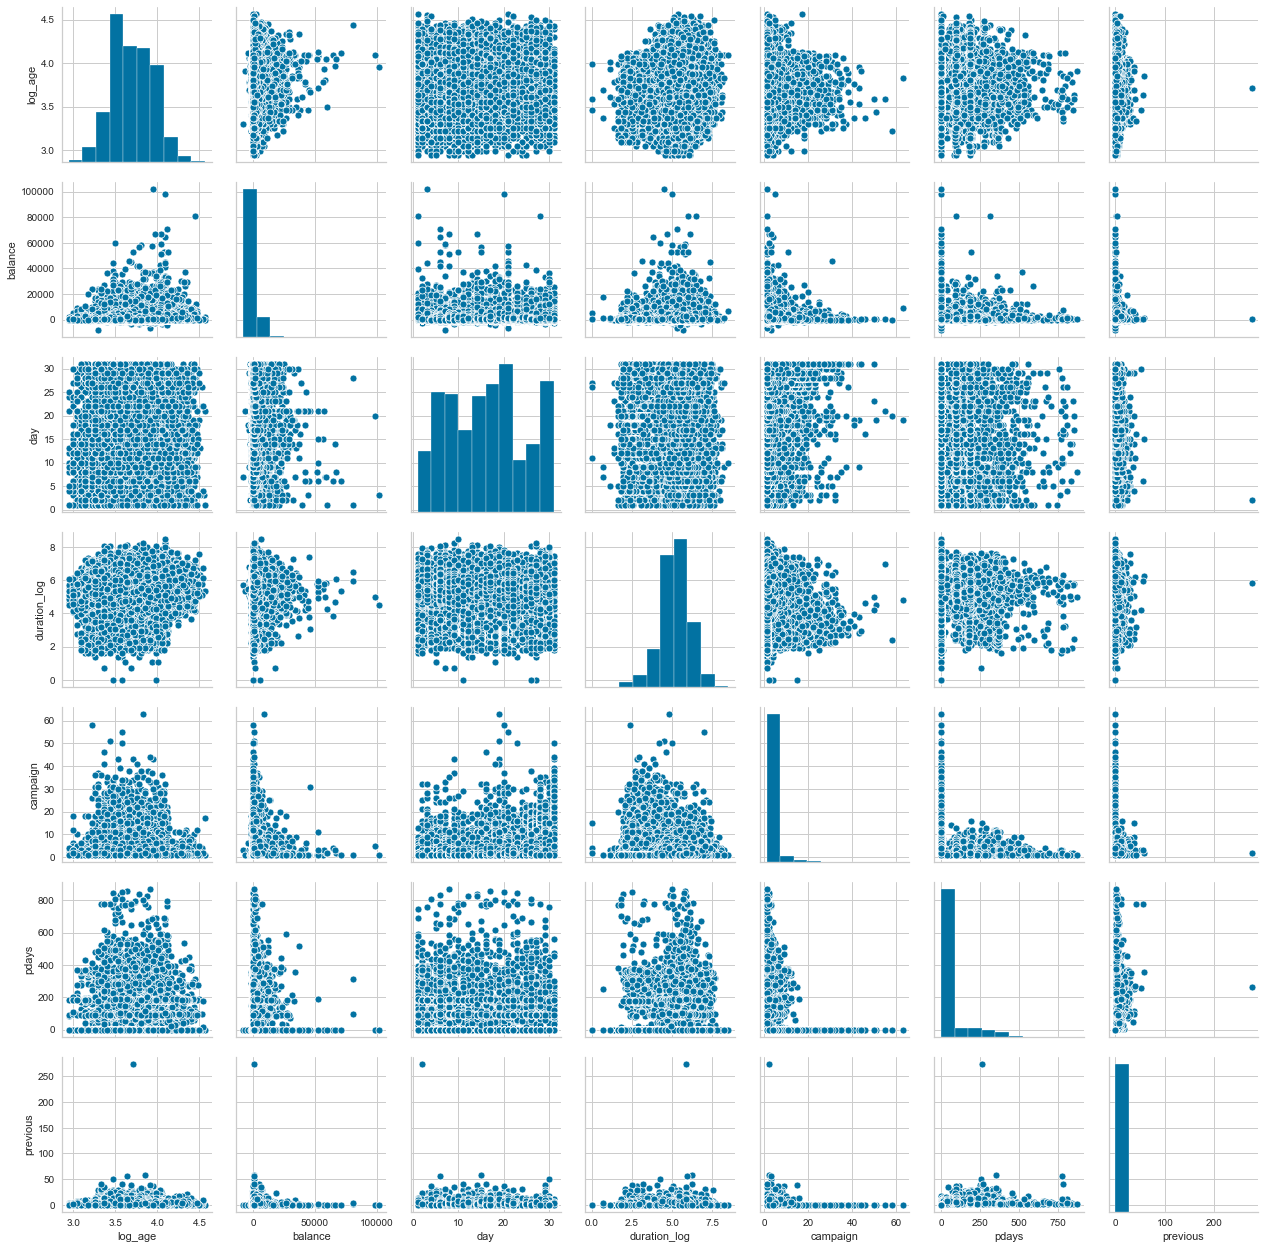

In [37]:
#I will create a pairplot on these columns now. 
sns.pairplot(df[numeric_columns])

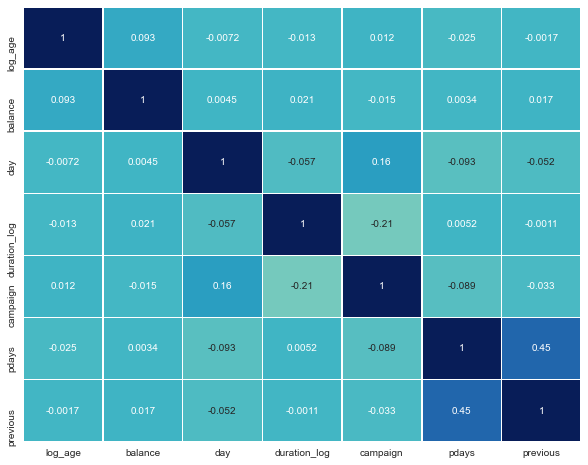

In [38]:
#we will check the correlation between them 

plt.figure(figsize=(10,8))

sns.heatmap(df[numeric_columns].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### Observation :
1. pdays and previous has a correlation. 
2. There is no other correlation seen.


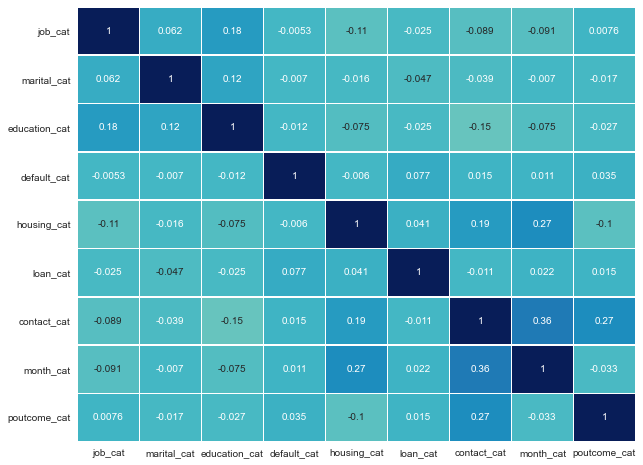

In [39]:
#we will create a correlation matrix for categorical columns too
plt.figure(figsize=(10,8))

sns.heatmap(df[categorical_columns].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### OBservation
1. No Strong correlation seen in any of the columns.

### Some additional analysis on pdays, previous, balance, campaign

In [40]:
df['pdays'].value_counts(bins = 10, normalize = True)

#we will divide pdays into two segments :
#(-1.873, 86.2] - pdays1
# combine all the ohter group into pdays2


#then try to do normalization on those values.

(-1.873, 86.2]   0.8298
(86.2, 173.4]    0.0509
(173.4, 260.6]   0.0476
(260.6, 347.8]   0.0404
(347.8, 435.0]   0.0272
(435.0, 522.2]   0.0021
(522.2, 609.4]   0.0009
(696.6, 783.8]   0.0004
(609.4, 696.6]   0.0004
(783.8, 871.0]   0.0003
Name: pdays, dtype: float64

In [41]:
#we divide the values of balance into bins that will give us some direction to proceed i.e : either drop the remaining values or combine them.
print(df['balance'].value_counts(bins = 10, normalize = True))
print(df['balance'].value_counts(bins = 10))


#we will divide balance into three segments :
#(-8129.147, 2995.6] - balance1
# combine all the ohter group into balance2


#then try to do normalization on those values.

(-8129.147, 2995.6]   0.8756
(2995.6, 14010.2]     0.1157
(14010.2, 25024.8]    0.0065
(25024.8, 36039.4]    0.0013
(36039.4, 47054.0]    0.0005
(47054.0, 58068.6]    0.0002
(58068.6, 69083.2]    0.0001
(91112.4, 102127.0]   0.0000
(80097.8, 91112.4]    0.0000
(69083.2, 80097.8]    0.0000
Name: balance, dtype: float64
(-8129.147, 2995.6]    39587
(2995.6, 14010.2]       5233
(14010.2, 25024.8]       294
(25024.8, 36039.4]        58
(36039.4, 47054.0]        21
(47054.0, 58068.6]         7
(58068.6, 69083.2]         6
(91112.4, 102127.0]        2
(80097.8, 91112.4]         2
(69083.2, 80097.8]         1
Name: balance, dtype: int64


#### Observation :
1. we will divide the group into 2 parts.  

In [42]:
#performing similar binning for campaign.
df['campaign'].value_counts(bins = 20, normalize = True)

#we will divide campaign into three segments :
#(0.9369999999999999, 2.771] - campaign1
# (2.771, 4.543] - campaign2
#combine all the other into campaign3

#then try to do normalization on those values.

(0.9369999999999999, 4.1]   0.8647
(4.1, 7.2]                  0.0838
(7.2, 10.3]                 0.0251
(10.3, 13.4]                0.0108
(13.4, 16.5]                0.0057
(16.5, 19.6]                0.0036
(19.6, 22.7]                0.0022
(22.7, 25.8]                0.0014
(28.9, 32.0]                0.0010
(25.8, 28.9]                0.0009
(32.0, 35.1]                0.0003
(35.1, 38.2]                0.0002
(41.3, 44.4]                0.0001
(38.2, 41.3]                0.0001
(47.5, 50.6]                0.0000
(56.8, 59.9]                0.0000
(44.4, 47.5]                0.0000
(50.6, 53.7]                0.0000
(53.7, 56.8]                0.0000
(59.9, 63.0]                0.0000
Name: campaign, dtype: float64

In [43]:
#performing similar binning for previous.
print(df['previous'].value_counts(bins = 8, normalize = True))
print(df['previous'].value_counts(bins = 8))

#since the first bin covers 99% of the value , we can safely remove the other values.

(-0.276, 34.375]    0.9998
(34.375, 68.75]     0.0002
(240.625, 275.0]    0.0000
(206.25, 240.625]   0.0000
(171.875, 206.25]   0.0000
(137.5, 171.875]    0.0000
(103.125, 137.5]    0.0000
(68.75, 103.125]    0.0000
Name: previous, dtype: float64
(-0.276, 34.375]     45200
(34.375, 68.75]         10
(240.625, 275.0]         1
(206.25, 240.625]        0
(171.875, 206.25]        0
(137.5, 171.875]         0
(103.125, 137.5]         0
(68.75, 103.125]         0
Name: previous, dtype: int64


#### Equiped with the above knowledge we will now create new columns for these 4 columns.

In [44]:
#for pdays :

df['pdays_cut'] = pd.cut(df['pdays'], bins = 10, labels = ['pdays1','pdays2','pdays3','pdays4','pdays5','pdays6','pdays7','pdays8','pdays9','pdays10'])


In [45]:
df['pdays_cut'].value_counts()

pdays1     37516
pdays2      2299
pdays3      2154
pdays4      1825
pdays5      1231
pdays6        96
pdays7        39
pdays9        18
pdays8        18
pdays10       15
Name: pdays_cut, dtype: int64

In [46]:
#bankdf['job'].replace(to_replace = ['unknown'], value = 'blue-collar', inplace = True)
df['pdays_cut'].replace(to_replace = ['pdays5','pdays6','pdays7','pdays8','pdays9','pdays10'], value = 'pdays4', inplace = True)
df['pdays_cut'].replace(to_replace = ['pdays3'], value = 'pdays2', inplace = True)

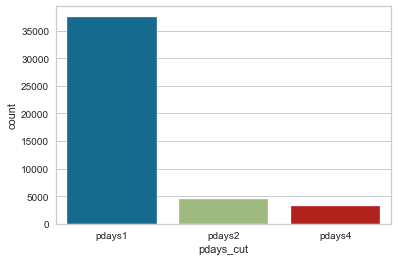

In [47]:
#the below is the plot for  pdays_cut .
sns.countplot(df['pdays_cut'])

In [48]:
#I will convert the pdays into category variable basically binning the values. 
df['pdays_cut'] = df['pdays_cut'].astype('category')
df['pdays_cat'] = df['pdays_cut'].cat.codes

In [49]:
#performing similar excersize for pdays, previous, balance, campaign


#for balance :

df['balance_cut'] = pd.cut(df['balance'], bins = 10, labels = ['balance1','balance2','balance3','balance4','balance5','balance6','balance7','balance8','balance9','balance10'])
df['balance_cut'].replace(to_replace = ['balance4','balance5','balance6','balance7','balance8','balance9', 'balance10'], value = 'balance3', inplace = True)
df['balance_cut'].replace(to_replace = ['balance3'], value = 'balance2', inplace = True)

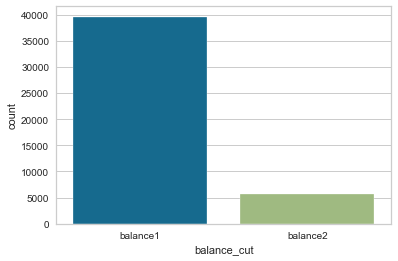

In [50]:
#the below is the plot for  balance_cut .
sns.countplot(df['balance_cut'])

In [51]:
#I will convert the balance into category variable basically binning the values. 
df['balance_cut'] = df['balance_cut'].astype('category')
df['balance_cat'] = df['balance_cut'].cat.codes

In [52]:
#performing similar excersize for  campaign


#for campaign :

df['campaign_cut'] = pd.cut(df['campaign'], bins = 20, labels = ['campaign1','campaign2','campaign3','campaign4','campaign5','campaign6','campaign7','campaign8','campaign9','campaign10'
                                                                ,'campaign11','campaign12','campaign13','campaign14','campaign15','campaign16','campaign17','campaign18','campaign19','campaign20'])
df['campaign_cut'].replace(to_replace = ['campaign4','campaign5','campaign6','campaign7','campaign8','campaign9','campaign10'
                                        ,'campaign11','campaign12','campaign13','campaign14','campaign15','campaign16','campaign17','campaign18','campaign19','campaign20'], value = 'campaign3', inplace = True)
df['campaign_cut'].replace(to_replace = ['campaign3'], value = 'campaign2', inplace = True)

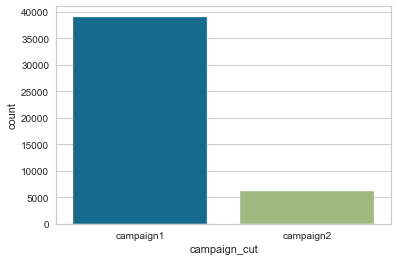

In [53]:
#the below is the plot for  campaign_cut .
sns.countplot(df['campaign_cut'])

In [54]:
#I will convert the campaign into category variable basically binning the values. 
df['campaign_cut'] = df['campaign_cut'].astype('category')
df['campaign_cat'] = df['campaign_cut'].cat.codes

In [55]:
#performing similar excersize for  previous


#for previous :

df['previous_cut'] = pd.cut(df['previous'], bins = 8, labels = ['previous1','previous2','previous3','previous4','previous5','previous6','previous7','previous8'])
df['previous_cut'].replace(to_replace = ['previous3','previous4','previous5','previous6','previous7','previous8'], value = 'previous2', inplace = True)

In [56]:
#dropping the rows that has the value of previous2
df.drop(df.loc[df['previous_cut']=='previous2'].index, inplace = True)

In [57]:
#I will convert the previous into category variable basically binning the values. 
df['previous_cut'] = df['previous_cut'].astype('category')
df['previous_cat'] = df['previous_cut'].cat.codes

In [58]:
#we now investigate the dataframe as below.
df.head()

,log_age,balance,day,duration_log,campaign,pdays,previous,job_cat,marital_cat,education_cat,...,poutcome_cat,Target_cat,pdays_cut,pdays_cat,balance_cut,balance_cat,campaign_cut,campaign_cat,previous_cut,previous_cat
0,4.0775,2143,5,5.5683,1,-1,0,4,1,2,...,3,0,pdays1,0,balance1,0,campaign1,0,previous1,0
1,3.8067,29,5,5.0239,1,-1,0,9,2,1,...,3,0,pdays1,0,balance1,0,campaign1,0,previous1,0
2,3.5264,2,5,4.3438,1,-1,0,2,1,1,...,3,0,pdays1,0,balance1,0,campaign1,0,previous1,0
3,3.8712,1506,5,4.5326,1,-1,0,1,1,1,...,3,0,pdays1,0,balance1,0,campaign1,0,previous1,0
4,3.5264,1,5,5.2933,1,-1,0,1,2,1,...,3,0,pdays1,0,balance1,0,campaign1,0,previous1,0


In [59]:
#the following is the datatypes of the dataframe after all the changes done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   log_age        45200 non-null  float64 
 1   balance        45200 non-null  int64   
 2   day            45200 non-null  int64   
 3   duration_log   45200 non-null  float64 
 4   campaign       45200 non-null  int64   
 5   pdays          45200 non-null  int64   
 6   previous       45200 non-null  int64   
 7   job_cat        45200 non-null  int8    
 8   marital_cat    45200 non-null  int8    
 9   education_cat  45200 non-null  int8    
 10  default_cat    45200 non-null  int8    
 11  housing_cat    45200 non-null  int8    
 12  loan_cat       45200 non-null  int8    
 13  contact_cat    45200 non-null  int8    
 14  month_cat      45200 non-null  int8    
 15  poutcome_cat   45200 non-null  int8    
 16  Target_cat     45200 non-null  int8    
 17  pdays_cut      45200 non-null  

In [60]:
#we only filter out the numeric values from the dataframe

readydf = df.select_dtypes(include = 'number').copy()

In [61]:
readydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_age        45200 non-null  float64
 1   balance        45200 non-null  int64  
 2   day            45200 non-null  int64  
 3   duration_log   45200 non-null  float64
 4   campaign       45200 non-null  int64  
 5   pdays          45200 non-null  int64  
 6   previous       45200 non-null  int64  
 7   job_cat        45200 non-null  int8   
 8   marital_cat    45200 non-null  int8   
 9   education_cat  45200 non-null  int8   
 10  default_cat    45200 non-null  int8   
 11  housing_cat    45200 non-null  int8   
 12  loan_cat       45200 non-null  int8   
 13  contact_cat    45200 non-null  int8   
 14  month_cat      45200 non-null  int8   
 15  poutcome_cat   45200 non-null  int8   
 16  Target_cat     45200 non-null  int8   
 17  pdays_cat      45200 non-null  int8   
 18  balanc

In [62]:
#rename the Target_cot to Target
readydf.rename(columns = {'Target_cat': 'Target'}, inplace = True)

In [63]:
readydf.columns

Index(['log_age', 'balance', 'day', 'duration_log', 'campaign', 'pdays',
       'previous', 'job_cat', 'marital_cat', 'education_cat', 'default_cat',
       'housing_cat', 'loan_cat', 'contact_cat', 'month_cat', 'poutcome_cat',
       'Target', 'pdays_cat', 'balance_cat', 'campaign_cat', 'previous_cat'],
      dtype='object')

### Balancing the target variable

In [64]:
from imblearn.over_sampling import SMOTE

X = readydf[readydf.columns.difference(['Target'])]
y = readydf['Target']

#create smote instance
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_sample(X, y.ravel())


## End of EDA

### Splitting the data into train and validation portion Begins

The data has been prepared, scaled and the SMOTE has been applied as a part of EDA above.

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm , test_size = 0.3, random_state = 42)

In [66]:
#The number of records for Y = 0 and Y in the train and test split are as follows :
print('Train split for Y:')
print('Y = 1 in train split: {} '.format(sum(Y_train == 1)))
print('Y = 0 in train split: {} '.format(sum(Y_train == 0)))

print('Test split for Y:')
print('Y = 1 in train split: {} '.format(sum(Y_test == 1)))
print('Y = 0 in train split: {} '.format(sum(Y_test == 0)))



#We see that we have nearly equal representation of Y=0 and Y =1 in both test and train splits.

Train split for Y:
Y = 1 in train split: 27961 
Y = 0 in train split: 27917 
Test split for Y:
Y = 1 in train split: 11952 
Y = 0 in train split: 11996 


### Splitting the data into train and validation portion Ends

## Logistic Regression and Decision Tree

### Logistic Regression

In [67]:
#we now use Logistic Regression module with lasso regression:
#max_iter of 10000. 

logisticRegr = LogisticRegression(max_iter = 2000,  random_state = 42)

In [68]:
#we also create hyperparameters for penalty:
penalty = ['l1', 'l2']
solver = ['saga']

# Create hyperparameter options
hyperparameters = dict(penalty=penalty, solver = solver)

In [69]:
# Create grid search using 5-fold cross validation
gridsearchclf = GridSearchCV(logisticRegr, hyperparameters, cv = 5, verbose = 0, n_jobs = 3)

In [70]:
# Fit grid search
best_model = gridsearchclf.fit(X_train, Y_train)


D:\anaconda_installation\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [71]:
y_predict = best_model.predict(X_test)

print(accuracy_score(Y_test, y_predict))

print(classification_report(Y_test, y_predict))

0.6064389510606314
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     11996
           1       0.64      0.47      0.54     11952

   micro avg       0.61      0.61      0.61     23948
   macro avg       0.61      0.61      0.60     23948
weighted avg       0.61      0.61      0.60     23948



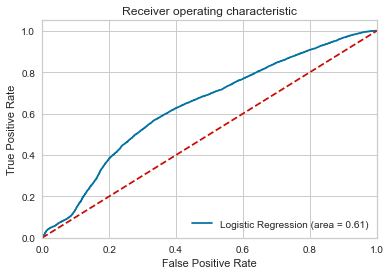

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, best_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decision Tree

In [73]:
#we now use Logistic Regression module with lasso regression:
decisionTree = DecisionTreeClassifier(random_state = 42)

In [74]:
#we also create hyperparameters for penalty:
criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,9,10,11, 12]

# Create hyperparameter options
hyperparameters = dict(criterion=criterion, max_depth = max_depth)

In [75]:
gridsearchTreeclf = GridSearchCV(decisionTree, hyperparameters, cv = 5, verbose = 0, n_jobs = 3)

In [76]:
# Fit grid search
best_tree_model = gridsearchTreeclf.fit(X_train, Y_train)

In [77]:
y_treepredict = best_tree_model.predict(X_test)

print(accuracy_score(Y_test, y_treepredict))

print(classification_report(Y_test, y_treepredict))

0.9091364623350593
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11996
           1       0.90      0.92      0.91     11952

   micro avg       0.91      0.91      0.91     23948
   macro avg       0.91      0.91      0.91     23948
weighted avg       0.91      0.91      0.91     23948



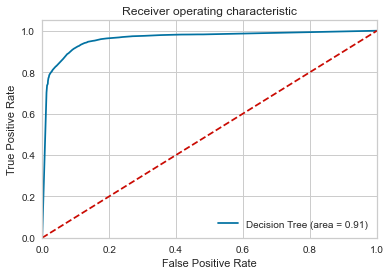

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, best_tree_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, best_tree_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion and Model Selection:
1. Accuracy : Decision Tree is better.
2. Precision : Decision Tree is better.
3. Recall : Decision Tree is better.

Since the problem statement is to identify individuals who are most likely to subscribe to the term deposit, I will look for a high precision and High recall because of the following reasons:
* Out of total values classified as positive candidates, I want to have the maximum correct predictions.
* I want my model to dedect the maximum number of candidates who actually subscribe - this implies i need less number of false negatives.

Hence I will use the Decision Tree classifier for my business case.


## Bagging, Boosting

### Bagging

#### Bagging for Logistic Regression

In [79]:
baggClfLogReg = BaggingClassifier(base_estimator = gridsearchclf, n_estimators = 10, bootstrap= True, oob_score = True,  n_jobs = 3, random_state = 42, max_samples = .7)

In [80]:
# Fit grid search
baggClfLogRegModel = baggClfLogReg.fit(X_train, Y_train)
y_baggclflogreg = baggClfLogRegModel.predict(X_test)

print(accuracy_score(Y_test, y_baggclflogreg))

print(classification_report(Y_test, y_baggclflogreg))

D:\anaconda_installation\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda_installation\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.6064389510606314
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     11996
           1       0.64      0.47      0.55     11952

   micro avg       0.61      0.61      0.61     23948
   macro avg       0.61      0.61      0.60     23948
weighted avg       0.61      0.61      0.60     23948



#### Bagging for Decision Tree

In [81]:
#Bagging for Decision Tree

baggClfDecTree = BaggingClassifier(base_estimator = best_tree_model, n_estimators = 20, bootstrap= True, oob_score = True,  n_jobs = 3, random_state = 42, max_samples = .7)
# Fit grid search
baggClfdectreemodel = baggClfDecTree.fit(X_train, Y_train)
y_baggclfdectree = baggClfdectreemodel.predict(X_test)

print(accuracy_score(Y_test, y_baggclfdectree))

print(classification_report(Y_test,y_baggclfdectree))

0.9277183898446635
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11996
           1       0.92      0.94      0.93     11952

   micro avg       0.93      0.93      0.93     23948
   macro avg       0.93      0.93      0.93     23948
weighted avg       0.93      0.93      0.93     23948



#### Bagging for Random Forests

In [83]:
# we will initalize a Random forest classifier and pass this classifier to gridsearchcv into Bagging
rfcl = RandomForestClassifier(n_estimators = 50)

In [84]:
#Bagging for Decision Tree

baggClfrandomforest = BaggingClassifier(base_estimator = rfcl, n_estimators = 20, bootstrap= True, oob_score = True,  n_jobs = 3, random_state = 42, max_samples = .7)
# Fit grid search
baggClfranforestmodel = baggClfrandomforest.fit(X_train, Y_train)
y_baggclfranforest = baggClfranforestmodel.predict(X_test)

print(accuracy_score(Y_test, y_baggclfranforest))

print(classification_report(Y_test,y_baggclfranforest))

0.9458409888090864
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11996
           1       0.95      0.94      0.95     11952

   micro avg       0.95      0.95      0.95     23948
   macro avg       0.95      0.95      0.95     23948
weighted avg       0.95      0.95      0.95     23948



### Conclusion for Bagging:
1. Random forests gives the best precision and recall values.
2. The precision and recall with Bagging for decision tree is better than the standalone decision tree model
3. The Precision and recall for Logistic Regression did not improve with Baggging.

### Boosting

#### GradientBoosting

In [85]:
#we will use gridsearchcv for Gradient Boosting


In [89]:
#we initialize the model 
gradBoostinit = GradientBoostingClassifier(random_state = 42, n_estimators = 30)

In [95]:
#we also create hyperparameters for penalty:
learning_rate = [0.1, 0.2]
max_features  = ['sqrt', 'log2']
loss = ['deviance', 'exponential']

# Create hyperparameter options
hyperparameters = dict(learning_rate=learning_rate, max_features = max_features, loss = loss)

# Create grid search using 5-fold cross validation
gradBoostGridSearch = GridSearchCV(gradBoostinit, hyperparameters, cv = 5, verbose = 0, n_jobs = 3)

In [91]:
gradBoostModel = gradBoostGridSearch.fit(X_train, Y_train)
y_gradBoost = gradBoostModel.predict(X_test)

print(accuracy_score(Y_test, y_gradBoost))

print(classification_report(Y_test,y_gradBoost))

0.920661433105061
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11996
           1       0.92      0.92      0.92     11952

   micro avg       0.92      0.92      0.92     23948
   macro avg       0.92      0.92      0.92     23948
weighted avg       0.92      0.92      0.92     23948



### Observations for Gradient Boosting:

1. The Accuracy is at par with the decision tree.
2. The Precision and recall is at 92 %.
3. Bagging with Random Forest has the highest accuracy, precision and recall values.

#### AdaBoosting

In [116]:
#we initialize the model 
#we will not use the logistic regression as the base estimator as it takes more time and does not deliver greater accuracy.
#we will initialize AdaBoost with Decision tree and then with random forest classifier



#AdaBoost with Decision Tree

AdaBoostDTinit = AdaBoostClassifier(base_estimator = best_tree_model, random_state = 42, n_estimators = 50, algorithm='SAMME', learning_rate = 0.1)


#AdaBoost with Random Forest
AdaBoostRFinit = AdaBoostClassifier(base_estimator = rfcl, random_state = 42, n_estimators = 50, algorithm='SAMME', learning_rate = 0.1)

In [120]:
AdaBoostDTModel = AdaBoostDTinit.fit(X_train, Y_train)

ValueError: GridSearchCV doesn't support sample_weight.

In [118]:
#AdaBoostDTModel = AdaBoostDTinit.fit(X_train, Y_train)

AdaBoostRFModel = AdaBoostRFinit.fit(X_train, Y_train)

In [119]:
y_AdaBoost = AdaBoostRFModel.predict(X_test)

print(accuracy_score(Y_test, y_AdaBoost))

print(classification_report(Y_test,y_AdaBoost))

0.9483881743778186
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11996
           1       0.96      0.94      0.95     11952

   micro avg       0.95      0.95      0.95     23948
   macro avg       0.95      0.95      0.95     23948
weighted avg       0.95      0.95      0.95     23948



#### Observations for AdaBoost:

1. I cannot use the decision tree model that I generated using GridSearchCV as GridSearchCV Does not support sample_weight.
2. I can therefore only use random forest classifier as my base estimator.
3. The accuracy is .948
4. Precision and Recall are : 0.94 and 0.96 , which is better than decision tree 



### Comparison Dataframe

In [121]:
#we first form a results dict

results_dict = [{'Method' : 'AdaBoost', 'accuracy': .948 , 'precisionfor1':0.96, 'recallfor1':0.94},
               {'Method' : 'GradBoost', 'accuracy': .920 , 'precisionfor1':0.92, 'recallfor1':0.92},
               {'Method' : 'Bagging', 'accuracy': .945 , 'precisionfor1':0.95, 'recallfor1':0.94},
               {'Method' : 'DecisionTree', 'accuracy': .9091 , 'precisionfor1':0.90, 'recallfor1':0.92},
               {'Method' : 'LogisticRegression', 'accuracy': .6064 , 'precisionfor1':0.64, 'recallfor1':0.47}
              ]

resultsdf = pd.DataFrame(results_dict)

In [122]:
resultsdf

,Method,accuracy,precisionfor1,recallfor1
0,AdaBoost,0.9480,0.9600,0.9400
1,GradBoost,0.9200,0.9200,0.9200
2,Bagging,0.9450,0.9500,0.9400
3,DecisionTree,0.9091,0.9000,0.9200
4,LogisticRegression,0.6064,0.6400,0.4700


## Conclusion

1. Since the business objective is to get the maximum number of candidates to subscribe to the term deposit, we choose High precision and high recall.
2. Going by the above metrics, we find that the Adaboost classifier has the maximum accuracy , precision and recall combination. 
3. I will recommend the Adaboost classifier based on the above observations.